# A Case study on RandomForest
You are a Data scientist at the Forest bank, and the bank has been facing a number of fraudulent transactions. 
Fradulent transaction are those which are not done by the user itself but by a hacker or by a card thief or by doing a fishing attack.
The bank has a huge dataset of it's credit card users and the bank has also done the job of marking these transactions as fraudulent or not. You being banks' Data science expert have been given the task to first analyse this data and generate insights and then predict if a transaction on a credit card is going to be fraud or not.  

### Data Dictionary
**transdatetrans_time**: The date and time of the transaction.

**cc_num**: credit card number.

**merchant**: Merchant who was getting paid.

**category**: In what area does that merchant deal.

**amt**: Amount of money in American Dollars.

**first**: first name of the card holder.

**last**: last name of the card holder.

**gender**: Gender of the cardholder.Just male and female!

**street**:Street of card holder residence

**city**:city of card holder residence

**state**:state of card holder residence

**zip**:ZIP code of card holder residence

**lat**:latitude of card holder

**long**:longitude of card holder

**city_pop**:Population of the city

**job**:trade of the card holder

**dob**:Date of birth of the card holder

**trans_num**: Transaction ID

**unix_time**: Unix time which is the time calculated since 1970 to today.

**merch_lat**: latitude of the merchant

**merch_long**:longitude of the merchant

**is_fraud**: Whether the transaction is fraud(1) or not(0)

In [72]:
#import numpt library
import numpy as np
#import pandas library
import pandas as pd
# import matplotlib library for plotting
import matplotlib.pyplot as plt

#import libraries for modelling

#import column selector from sklearn
from sklearn.compose import make_column_selector as selector
#import onehotencoder from sklearn
from sklearn.preprocessing import OneHotEncoder
#import Column transformer from sklearn
from sklearn.compose import ColumnTransformer
#import train test split from sklearn
from sklearn.model_selection import train_test_split


In [73]:
# loading the training dataset
train = pd.read_csv("/Users/umang/Downloads/fraudData/fraudTrain.csv",on_bad_lines='skip')

In [56]:
# checking the shape
train.shape

(1296675, 23)

In [74]:
#Have a look at the data, head function of pandas does this for us, 5 means we just want to look at the first 5 rows
train.head(5)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [75]:
# dtypes function of pandas gives us the datatypes of the columns
train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [18]:
#check out the duplicates

# duplicated() selects the duplicate rows except first
# occurrence based on all columns
duplicate = train[train.duplicated()]
 
print("Duplicate Rows :")
duplicate

#We found no duplicate rows

Duplicate Rows :


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [30]:
# Checking null values 
#isna() gets all the rows with null values and sum gives us the total sum of each such row

train.isna().sum()

#interestinlgy we find no nulls in the data, but we should always check for nulls

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [28]:
#Lets look at how many unique merchants do we have
train.merchant.unique().shape


(693,)

### Exploratory Data Analysis or EDA
This is a common process we follow when we first get the data. The idea is to analyse the data and  generate insights that create a lot of value for business problems.  Also this is the part where we take decisions on model building by looking at the data

### Numerical Analysis and histograms

In [59]:
# We will start by looking at the primary key or the column which always has a unique value in the data. 
# Usually transaction numbers are unique, lets check that out

# we will use the pandas unique function which gives us the unique values of a column as an array and get its shape
transCount=train.trans_num.unique().shape[0]

# we now look at the total count of rows in the data
totalCount= train.shape[0]
print("Unique Transaction numbers count",transCount)
print("Total count",totalCount)

# as we can see they both match, so transation number is indeed the primary key.


Transaction number count 1296675
Total count 1296675


### Pie chart

<AxesSubplot: ylabel='trans_num'>

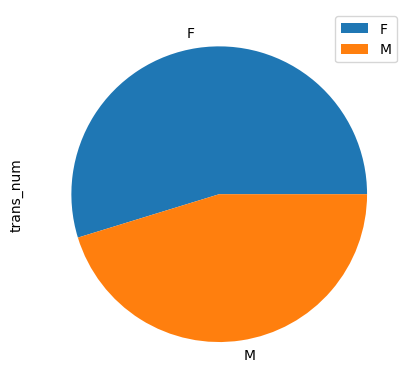

In [54]:
# We first start by looking at the gender column of this data, the most representative way of doing this is using pie-charts
# We do a group by on the data, on the gender column and then count of trans_num, which is the transacation number column
train.groupby(['gender']).count().plot(kind='pie', y='trans_num')

# As we can see, Females have more counts of transactions then male.

To dive deeper on the categorical variables, lets do similar pie charts on loop for all the categorical variables. Though there are simpler ways of doing this but the purpose of this notebook is to teach you as many relevant skills and functions as possible.


In [6]:
#lets look at all the columns with object datatype first using select_dtypes and asking it to include object type
objectList=train.select_dtypes(include=['object']).columns.tolist()
print(objectList)

['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


In [23]:
#Since we know some variables aren't categorical and it makes no sense in viewing their pie charts,
# we will remove them from the list
remList=['trans_date_trans_time','first', 'last','street','trans_num','dob', 'merchant', 'job','city']
#Lets subtract the 2 lists using Python sets()
finalList=list(set(objectList)-set(remList))
print(finalList)


['gender', 'state', 'category']


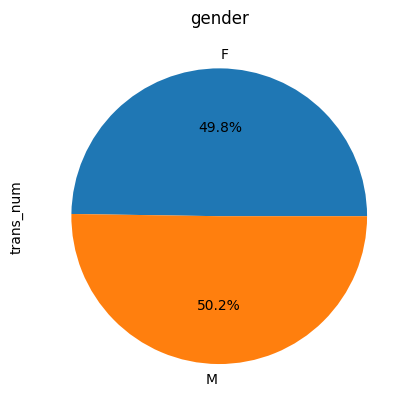

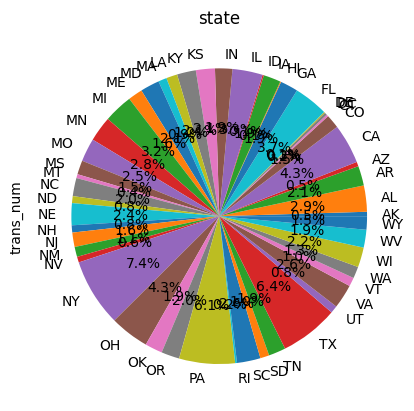

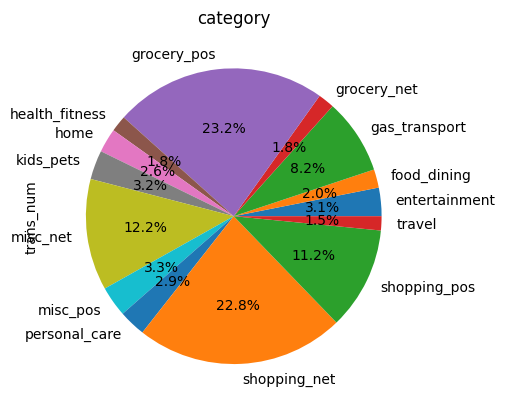

In [30]:
#Lets iterate over our final list and print pie charts for all these categorical variables
#Also this time lets also see the percentages, we just need to pass  autopct='%1.1f%% for this 

for col in finalList:
    train[train.is_fraud==1].groupby([col]).count().plot(kind='pie', y='trans_num', title=str(col), 
                                                          legend=False, autopct='%1.1f%%')



<AxesSubplot: >

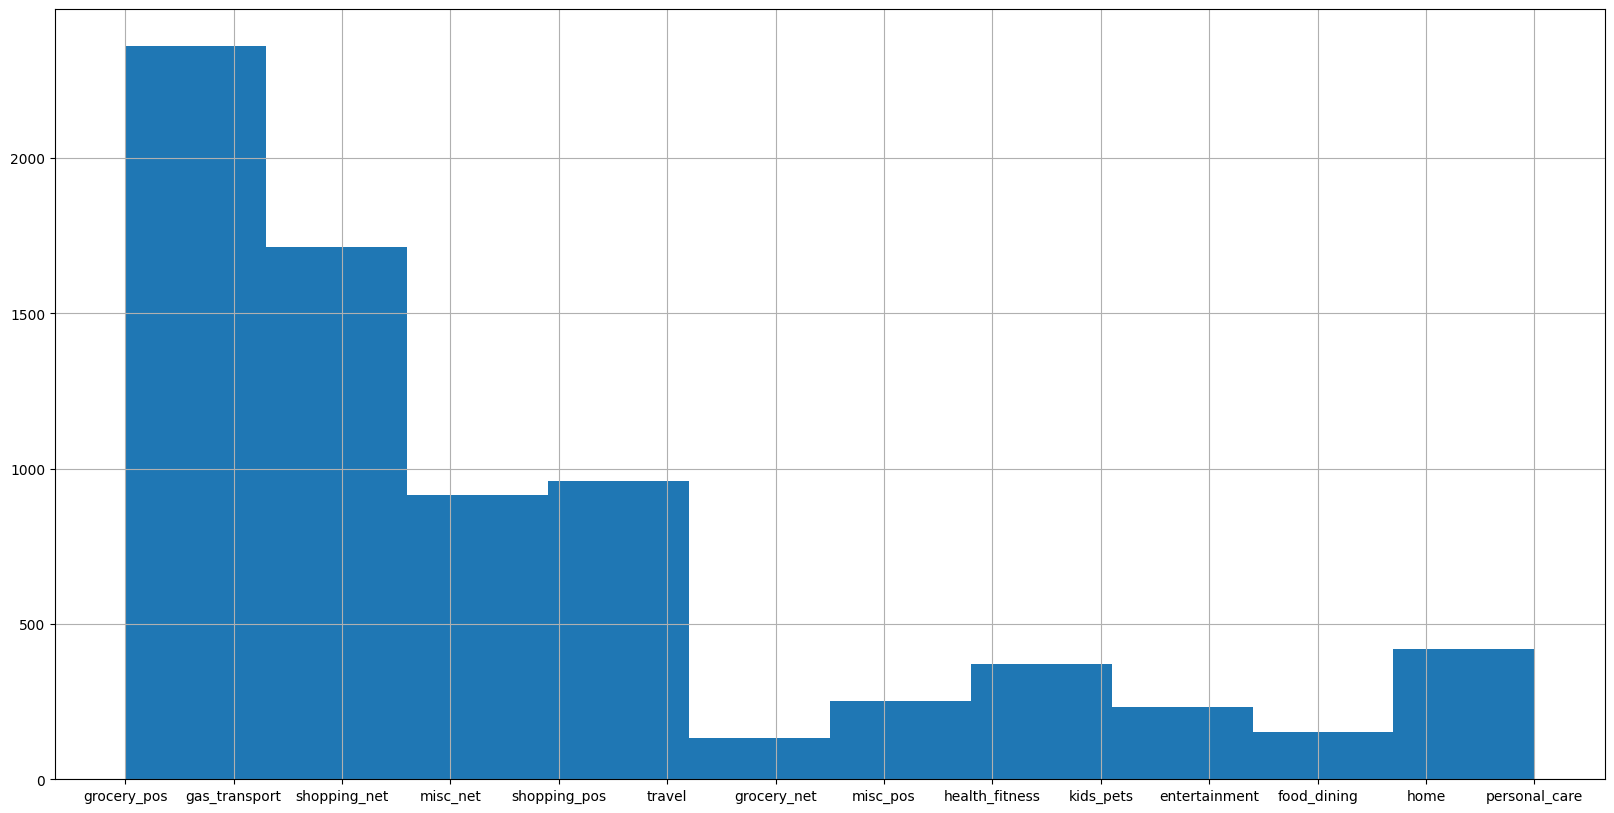

In [19]:
#lets draw a histogram of categories of transactions that we have in this data, we will use Pandas hist function for this
# , which is the easiest way of doing this. We will also resize this so that we can see it properly

#set the figure size
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
#plot the histogram
train[train.is_fraud==1].category.hist(ax=ax)

We can clearly see that grocery_pos has the most fraudulent transactions, personal_care being the lowest
We have gotten this information from the pie chart already but the purpose of doing this via histogram were 2

1. We now know how to easily draw histograms in pandas
2. With histogram we also have counts of occurence instead of just percentages.

In [16]:
#Lets also look at the labels of data we have

#lets print the number of rows that have the labels "is_fraud"==0
# we first filter on transactions with is_fraud==0 and then get the shape of the resultant dataframe.
print("Transactions that have no fraud marked",train[train.is_fraud==0].shape[0])

#We similarly get the rows for is_fraud ==1
print("Transactions that have fraud marked",train[train.is_fraud==1].shape[0])




Transactions that have no fraud marked 1289169
Transactions that have fraud marked 7506


Lets have a look at the data, and analyse the frauds by city
 We do this by 
1. First filtering only the rows where is_fraud==1, i.e transactions where fraud has happened.
2. We then only select 2 columns city and transaction number,these are the columns we are interested in for this analysis
3. Lastly, we do a group by on the city column and count the transactions, this gives us the count of fraud transactions by city

In [81]:
#Lets have a look at the data, and analyse the frauds by city

train[train.is_fraud==1][['trans_num','city']].groupby(['city']).count().sort_values('trans_num', ascending=False)


,trans_num
city,
Houston,39
Warren,33
Naples,29
Huntsville,29
Topeka,27
...,...
Tupper Lake,3
Phenix City,2
Denham Springs,2


This is a good starting point to understand, how frauds are happening geographically, but business stakeholders are interested in the visualisations usually, lets do one!

### Geographical view

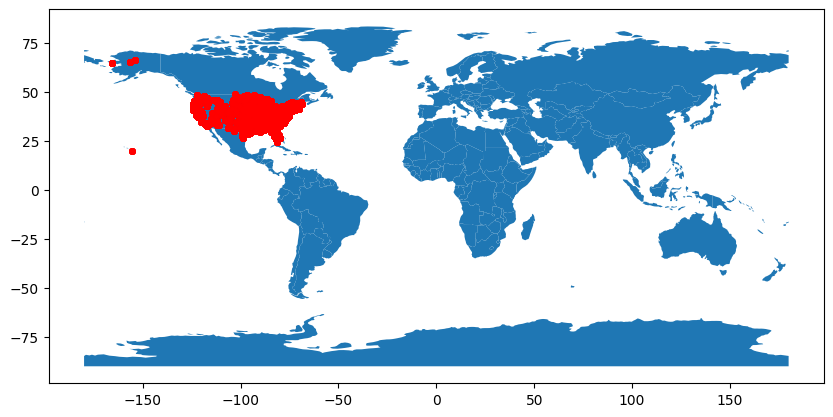

In [94]:
# We import shapely, which is a library for working with points and lat,longs
from shapely.geometry import Point

# geopandas is geo version of pandas, with geographical abilities, most functions are analogous to pandas
import geopandas as gpd
from geopandas import GeoDataFrame

# We firstly filter on the lat,long columns of transactions where fraud has happened
tempDf=train[train.is_fraud==1][['lat','long']]

# we then create a geopandas dataframe by first creating a geometry column from our given lat longs
geometry = [Point(xy) for xy in zip(tempDf['long'], tempDf['lat'])]

#We then use the geometry column to create a geodataframe
gdf = GeoDataFrame(tempDf, geometry=geometry)   

#this is a simple map that goes with geopandas, we basically load the whole worlds' map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#lastly we just plot it with figure size and color options.
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

OK, now we can see that, most frauds were done in the USA, that too on a set of geographical states, we also know that soutern US states such as Texas, Arkansas are the most effected

<AxesSubplot: >

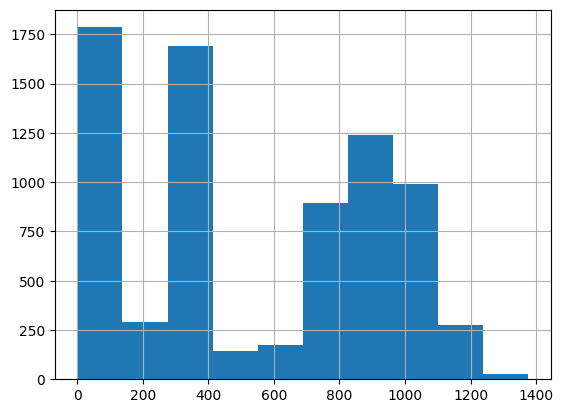

In [100]:
#Lets now analyse the categories where fraudulent transacations are happening

#we first filter on fraudulent transactions and then do a hist on them
train[train.is_fraud==1]['amt'].hist()

As can be seen in the histogram, around 1750+ fraudulent transactions were in the bucket 0-100 dollars and least on the 1200-1400 dollars bucket

## Basic feature engineering

In [166]:
#To start with we will start with a small set of columns to baseline the model
# we create a list of the columns
columns_filter=['Category','gender','Job','merchant','amt','is_fraud', 'city']
# we then subset on those columns
data= train[columns_filter]

### 1 hot encoding
This technique is done for categorical variables and the idea is to create numerical features instead of textual or object features. For example in the column gender, in place of male of female, we will create 2 new columns, male and female and when there is a male, it will have 1 in the male column and 0 in the female and vice versa


In [167]:
#creates a 1-hot encoder
cat_encoder=OneHotEncoder(drop='first',handle_unknown='ignore')

#Transforms all the columns that have the datatype "object"
columnTransformer = ColumnTransformer(
    [
        ('categoricals_encoder', cat_encoder, selector(dtype_include=object)),
    ],
    remainder='passthrough'
)

In [169]:
#lets create training data X, by taking all the columns from the data except the last one, which is "is_fraud"
X=data.iloc[:,:-1]
#is_fraud is the column that we are trying to predict, so that becomes Y
y=data[['is_fraud']]

In [170]:
# info() gives us the information about all the columns in the data with memory usage
X.info(),y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Category  1296675 non-null  object 
 1   gender    1296675 non-null  object 
 2   Job       1296675 non-null  object 
 3   merchant  1296675 non-null  object 
 4   amt       1296675 non-null  float64
 5   is_fraud  1296675 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 59.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 1 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   is_fraud  1296675 non-null  int64
dtypes: int64(1)
memory usage: 9.9 MB


(None, None)

In [164]:
#this step fits the One hot transformer on the model
X=columnTransformer.fit_transform(X)

In [165]:
#transformers_ gives us the columns on which 1-hot transformers was fit.
columnTransformer.transformers_[0]

('categoricals_encoder',
 OneHotEncoder(drop='first', handle_unknown='ignore'),
 ['Category', 'gender', 'Job', 'merchant'])

In [144]:
#lets do a train/test split, the idea is to split 80-20, as the test_size=0.2 means 20% of the data goes for test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [145]:
#lets look at the shape of both Train and test datasets X
X_train.shape,X_test.shape

((1037340, 1118), (259335, 1118))

In [146]:
#lets look at the shape of both Train and test datasets y
y_train.shape,y_test.shape

((1037340, 1), (259335, 1))

Now that we have a dataset ready lets look at the model of this case study and understand all the basics behind.

## RandomForest
Simple tree based algorithm for classification and regression both.  It uses an amazing concept of bagging. But first lets talk about decision trees

### Decision Trees
Decision trees work on simple ideas. We use a feature based separation. The idea is intutive, lets consider an example where you are trying to predict if a child is going to have a long height or not. When trying to do this, we could use simple columns like gender, age, physique and try to make decision using a tree like this:


![Simple Decision](decisionTree.png)
 This is how most of us would usually decide to make decision via trees, such simple looking models are called decision trees. But is it this simple?

Turns out no, as dataset increases and the features at hand increase, the trees get complex and it becomes more difficult to create these trees and its an NP hard problem! and we need to automate this via cost functions. We use functions such as gini's impurity:
G = sum(pk * (1 — pk))

pk is proportion of same class inputs present in a particular group. A perfect class purity occurs when a group contains all inputs from the same class, in which case pk is either 1 or 0 and G = 0, where as a node having a 50–50 split of classes in a group has the worst purity, so for a binary classification it will have pk = 0.5 and G = 0.5.

 So ultimately try to minimise Ginis' impurity to get a perfect tree

OK so that was about trees, what's a random forest then?



### Introducing Random Forests

Trees indeed suffer from overfitting because if we keep getting good splits that create perfect fits, ultimately we will have a tree that has the perfect branches covering all possible scenarios. Basically when a model shows high variance, its called overfitting. To solve overfitting, lets first learn about Bagging.

### Bagging
So we have established the fact that we need to reduce the variance of the model in order of avoid overfitting. To avoid overfitting we do something called ensemble of the classifiers.

What we are in turn trying to do is create a classifier that's nothing but the average of several classifiers, without going in to too much maths behind. The idea is that an ensemble of a few weak classifiers is better than a single classifier. But how do we get these many classifiers? 

We basically create random subsets of our original dataset with repetition and create classifiers from them and then take average of these predictions to get the results. This process of aggregating a number of mini predictors is called Bootstrap aggregating or bagging and it is the major concept behind RandomForests 

### RandomForest
 One of the most famous and useful bagged algorithms is the RandomForest! A RandomForest is essentially nothing else but bagged decision trees, with a slightly modified splitting criteria. The algorithm works as follows:
1. Create m datasets from the data with replacement, i.e data points could have repitition.
2. For each m dataset, create a decision tree but with one slight modification, choose k features randomly from total d features and consider these for your tree.
3. Create a final classifier which is just an average of all the classifiers created above.




Now that we have understood the concept behind RandomForests, lets implement this in Python. 
We'll use scikit-learn for this

In [35]:
#import randomforestclassifier from scikit learn, since we are solving a classification problem
from sklearn.ensemble import RandomForestClassifier
#Classification report gives us the results of our model
from sklearn.metrics import classification_report

In [152]:
#load the classifier, n_jobs is the parameter to set how many jobs to run in parallel. -1 mean using just 1 processor
clf = RandomForestClassifier(n_jobs=-1)
#calling .fit() on the training data runs the model on the training data.
clf.fit(X_train,y_train.values.ravel())
# .predict() makes the prediction from the trained model
pred=clf.predict(X_test)

#prints "-" 50 times for visual effect 
print("-"*50)


print("Random forest classifier results")


#prints out classification report



print(classification_report(y_test.values,pred))

--------------------------------------------------
Random forest classifier results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.83      0.62      0.71      1520

    accuracy                           1.00    259335
   macro avg       0.91      0.81      0.85    259335
weighted avg       1.00      1.00      1.00    259335



 OK, so as of now we are achieving 83% precision and 62% recall on training data, can we do better? lets see!

The description below is taken from scikit-learn 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The **F-1** score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-1 score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.



## Scikit Learn's Random forest parameters

*The text below is taken from official scikit learn's documentation*
*https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html*

**n_estimators** int, default=100
The number of trees in the forest.


**criterion** {“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation. Note: This parameter is tree-specific.

**max_depth**  int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split**  int or float, default=2
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


**min_samples_leaf**  int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
Changed in version 0.18: Added float values for fractions.

**min_weight_fraction_leaf** float, default=0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

**max_features**{“sqrt”, “log2”, None}, int or float, default=”sqrt”
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
.

**max_leaf_nodes** int, default=None
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**min_impurity_decrease** float, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.



**bootstrap** bool, default=True
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

**oob_score bool**, default=False
Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

**n_jobs** int, default=None
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

**random_state** int, RandomState instance or None, default=None
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). See Glossary for details.

**verbose** int, default=0
Controls the verbosity when fitting and predicting.

**warm_start** bool, default=False
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. See Glossary and Fitting additional weak-learners for details.

**class_weight**{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

For multi-output, the weights of each column of y will be multiplied.

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

**ccp_alpha** non-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.


**max_samples** int or float, default=None
If bootstrap is True, the number of samples to draw from X to train each base estimator.

If None (default), then draw X.shape[0] samples.
If int, then draw max_samples samples.
If float, then draw max_samples * X.shape[0] samples. Thus, max_samples should be in the interval (0.0, 1.0].
.



## Class imbalance and class weights
 So as we saw above, the data has class imbalance i.e We have more rows with is_fraud==0 then is_fraud==1 Class weights are one way to tackle this issue. Class weights add a weightage to the loss function and now one particular class gets more weightage than the other while calculating the loss. 
 
 It will get more clear as we implement this idea below.

In [154]:

# class weights are added to our Random forest classifier by just adding a class_weight parameter
# in the function call, now class 1 will have 4 times more weightage than the 0 class hence
# 4 times more penalty for the model for bad classification of class 1.  Lets see if we do better than the earlier results
clf = RandomForestClassifier(n_jobs=-1, class_weight={0:1,1:4})

#fits the model with given class weight above.
clf.fit(X_train,y_train.values.ravel())

#makes a prediction
pred=clf.predict(X_test)

print("-"*50)

print("Random forest classifier results")

print(classification_report(y_test.values,pred))


--------------------------------------------------
Random forest classifier results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.83      0.64      0.72      1520

    accuracy                           1.00    259335
   macro avg       0.91      0.82      0.86    259335
weighted avg       1.00      1.00      1.00    259335



As we can see we have increased both precision and recall by class weights trick

## Experimenting with more features
As we have understood, that more features would lead to better trees. Lets add more features to see the results


In [174]:
#### At times, we may want to create new features for increased accuracy, could we do that here? 

In [76]:
#lets look at all the training columns
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [77]:
#lets choose more columns this time than the smaller set earlier
columns_filter=['category','gender','job','merchant','amt', 'city','city_pop','state','is_fraud']
data= train[columns_filter]

In [78]:
#creates a 1-hot encoder
cat_encoder=OneHotEncoder(drop='first',handle_unknown='ignore')

#Transforms all the columns that have the datatype "object"
columnTransformer = ColumnTransformer(
    [
        ('categoricals_encoder', cat_encoder, selector(dtype_include=object)),
    ],
    remainder='passthrough'
)

In [79]:
#lets create training data X, by taking all the columns from the data except the last one, which is "is_fraud"

X=data.iloc[:,:-1]
y=data[['is_fraud']]

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   category  1296675 non-null  object 
 1   gender    1296675 non-null  object 
 2   job       1296675 non-null  object 
 3   merchant  1296675 non-null  object 
 4   amt       1296675 non-null  float64
 5   city      1296675 non-null  object 
 6   city_pop  1296675 non-null  int64  
 7   state     1296675 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 79.1+ MB


In [81]:
#creates a 1-hot encoder tranform
X=columnTransformer.fit_transform(X)

In [82]:
#Create training and test data splits as earlier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:


#create a RandomForest classifier 
clf = RandomForestClassifier(n_jobs=-1)

# Fit the model
clf.fit(X_train,y_train.values.ravel())

#print the predictions
pred=clf.predict(X_test)

print("-"*50)

print("Random forest classifier results")
#prints classfication report
print(classification_report(y_test.values,pred))

--------------------------------------------------
Random forest classifier results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.87      0.63      0.73      1520

    accuracy                           1.00    259335
   macro avg       0.93      0.82      0.87    259335
weighted avg       1.00      1.00      1.00    259335



As expected, we have now 86% precision and 63% recall that too without class weights, just by increasing features! decision trees and albiet random forests do work better with more features

## Hyperparameter tuning using Grid Search

The ideal way to find a fit for an algorithm is to use Grid search. This is how grid search works:
We create a search space which is a grid of hyperparameter values and evaluate every position in the grid.


Grid search makes sure every possible combination is checked and tries to find the combination which gives the best possible metric and takes a lot of time to execute.

We manually define the range of each hyperparameter that we want to check.

Please un-comment these lines when you run this code on a server or a high configuration machine, **running on local takes a lot of time and could potentially crash your machine**

In [83]:
#importing scikit learns' gridsearch
# from sklearn.model_selection import GridSearchCV



In [84]:
#define a classfier with no set hyperparameter, as we will be finding the best fit using grid search

# clf=RandomForestClassifier(random_state=42)

In [85]:
# This is how grid is defined, we create a dictionary of hyperparameters we want to check and pass a list

# param_grid = { 
 # 'n_estimators': [100, 500],
 #    'max_features': ['auto', 'sqrt', 'log2'],
 #    'criterion' :['gini', 'entropy']
# }

In [88]:
# Then you finally run the grid search

# gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
# gridSearch.fit(X_train, y_train)

In [ ]:
## This is how you get the best params and later possibly use them

# CV_rfc.best_params_

## Resuts on Test data.

In [219]:
#reads test data
test_data=pd.read_csv('/Users/umang/Downloads/fraudData/fraudTest.csv')
#filters the columns
test_data=test_data[columns_filter]

#shows test data
test_data

,category,gender,job,merchant,amt,city,city_pop,state,is_fraud
0,personal_care,M,Mechanical engineer,fraud_Kirlin and Sons,2.86,Columbia,333497,SC,0
1,personal_care,F,"Sales professional, IT",fraud_Sporer-Keebler,29.84,Altonah,302,UT,0
2,health_fitness,F,"Librarian, public","fraud_Swaniawski, Nitzsche and Welch",41.28,Bellmore,34496,NY,0
3,misc_pos,M,Set designer,fraud_Haley Group,60.05,Titusville,54767,FL,0
4,travel,M,Furniture designer,fraud_Johnston-Casper,3.19,Falmouth,1126,MI,0
...,...,...,...,...,...,...,...,...,...
555714,health_fitness,M,Town planner,fraud_Reilly and Sons,43.77,Luray,519,MO,0
555715,kids_pets,M,Futures trader,fraud_Hoppe-Parisian,111.84,Lake Jackson,28739,TX,0
555716,kids_pets,F,Musician,fraud_Rau-Robel,86.88,Burbank,3684,WA,0
555717,travel,M,Cartographer,fraud_Breitenberg LLC,7.99,Mesa,129,ID,0


In [220]:
#creates test X and y
X_tr=test_data.iloc[:,:-1]
y_tr=test_data[['is_fraud']]

In [221]:
#fits 1-hot transform on test data
X_tr=columnTransformer.transform(X_tr)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:182: UserWarning: Found unknown categories in columns [2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [222]:
#predicts from the trained model
pred_tr=clf.predict(X_tr)
    
#prints classification report
print("-"*50)
print(clf.__class__.__name__)
print(classification_report(y_tr.values,pred_tr))

--------------------------------------------------
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.77      0.49      0.60      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.75      0.80    555719
weighted avg       1.00      1.00      1.00    555719



We can see that we are getting 77% precision 49% recall on test dataset with these features

## Exercise to try 
Try running the model created above with class weights